In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [87]:
df1=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2010.xlsx", sheet_name=None)

In [88]:
df1=df1['Daily Prices & Volumes']
df1



,Date,Average price (EUR/MWh),Traded volumes (MWh)
0,2010.07.21,47.803208,2278.1
1,2010.07.22,58.061250,917.6
2,2010.07.23,46.146042,1004.3
3,2010.07.24,43.593292,496.0
4,2010.07.25,19.148125,468.0
...,...,...,...
159,2010.12.27,55.974958,3701.4
160,2010.12.28,42.750333,3693.6
161,2010.12.29,49.985208,4059.6
162,2010.12.30,50.574417,3624.9


In [89]:
df1=df1[["Date","Average price (EUR/MWh)"]]
df1

,Date,Average price (EUR/MWh)
0,2010.07.21,47.803208
1,2010.07.22,58.061250
2,2010.07.23,46.146042
3,2010.07.24,43.593292
4,2010.07.25,19.148125
...,...,...
159,2010.12.27,55.974958
160,2010.12.28,42.750333
161,2010.12.29,49.985208
162,2010.12.30,50.574417


In [71]:
def replace_outliers_with_neighbors(df):
    for i in range(1, len(df) - 1):  
        for j in range(1,2):  
            current_value = df.iloc[i, j]
            upper_value = df.iloc[i - 1, j]
            lower_value = df.iloc[i + 1, j]
            neighbor_values = [upper_value, lower_value]
            mean_neighbor_value = sum(neighbor_values) /2
            if abs(current_value - mean_neighbor_value) > 10 * mean_neighbor_value or current_value<0:  
                df.iloc[i, j] = mean_neighbor_value 

In [92]:
replace_outliers_with_neighbors(df1)

In [39]:
df2=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2011.xlsx", sheet_name=None)
df3=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2012.xlsx", sheet_name=None)
df4=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2013.xlsm", sheet_name=None)
df5=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2014.xlsm", sheet_name=None)
df6=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2015.xlsm", sheet_name=None)
df7=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2016.xlsm", sheet_name=None)
df8=pd.read_excel(r"C:\Users\User\Downloads\Power Exchange Data_ 2017.xlsm", sheet_name=None)

In [43]:
df4.keys()

dict_keys(['Hourly Prices', 'Daily Prices', 'Weekly Prices', 'Monthly Prices', 'Annual Prices'])

C:\Users\User\AppData\Local\Temp\ipykernel_26072\2888776670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Date"]=pd.to_datetime(df1["Date"])


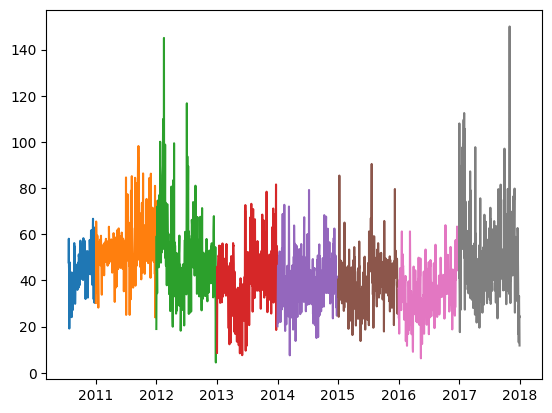

In [93]:
all_prices=[]
all_dates=[]
df1["Date"]=pd.to_datetime(df1["Date"])
plt.plot(df1["Date"],df1["Average price (EUR/MWh)"])
all_prices.extend(df1["Average price (EUR/MWh)"].tolist())
all_dates.extend(df1["Date"].tolist())
dfs=[df2,df3]
dfs2=[df4]
dfs3=[df5,df6,df7,df8]
for i in dfs:
    i=i['Daily Prices & Volumes']
    all_dates.extend(i["Date"].tolist())
    i["Date"]=pd.to_datetime(i["Date"])
    replace_outliers_with_neighbors(i)
    all_prices.extend(i["Average price (EUR/MWh)"].tolist())
    plt.plot(i["Date"],i["Average price (EUR/MWh)"])
    
for i in dfs2:
    i=i['Daily Prices']
    all_dates.extend(i["Date"].tolist())
    i["Date"]=pd.to_datetime(i["Date"])
    replace_outliers_with_neighbors(i)
    all_prices.extend(i["Average prices (EUR/MWh)"].tolist())
    plt.plot(i["Date"],i["Average prices (EUR/MWh)"])  

for i in dfs3:
    i=i['Daily Prices']
    i=i.groupby("Date").mean().reset_index()
    all_dates.extend(i["Date"].tolist())
    i["Date"] = pd.to_datetime(i["Date"], format='%d/%m/%Y')
    all_prices.extend(i["Average Prices (EUR/MWh)"].tolist())
    plt.plot(i["Date"],i["Average Prices (EUR/MWh)"])

<bound method NDFrame.head of           Date  Average Prices (EUR/MWh)
0   2014-01-01                 20.143750
1   2014-01-02                 29.068750
2   2014-01-03                 34.364583
3   2014-01-04                 46.384167
4   2014-01-05                 22.995000
..         ...                       ...
360 2014-12-27                 39.270833
361 2014-12-28                 38.925000
362 2014-12-29                 39.453750
363 2014-12-30                 41.663333
364 2014-12-31                 32.472083

[365 rows x 2 columns]>


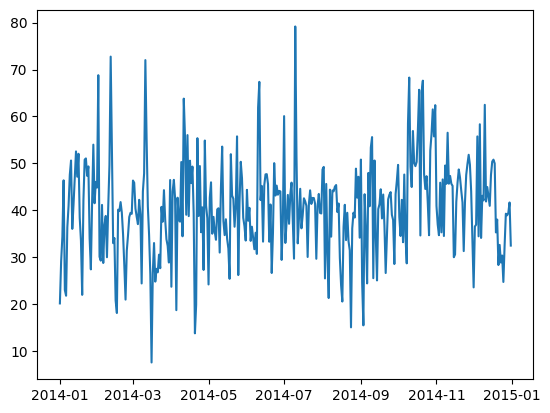

In [66]:
# Assuming df is your DataFrame containing the data

i=df5['Daily Prices']
i=i.groupby("Date").mean().reset_index()
i["Date"] = pd.to_datetime(i["Date"], format='%d/%m/%Y')
#replace_outliers_with_neighbors(i)
print(i.head)
plt.plot(i["Date"],i["Average Prices (EUR/MWh)"])

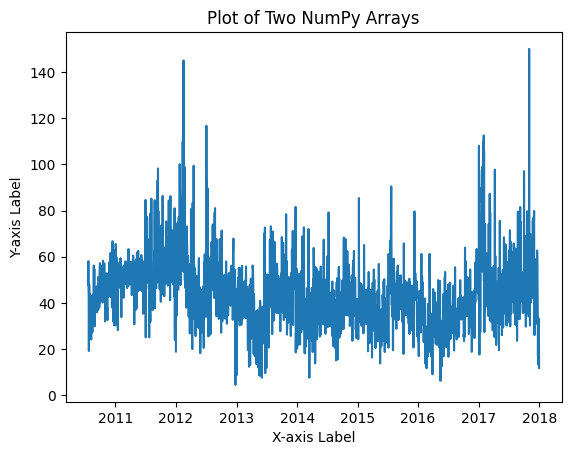

array([Timestamp('2010-07-30 00:00:00'), Timestamp('2010-07-31 00:00:00'),
       Timestamp('2010-08-01 00:00:00')], dtype=object)

In [96]:
import numpy as np
import matplotlib.dates as mdates
all_dates=np.array(all_dates)
dates = pd.to_datetime(all_dates, format='%Y/%m/%d')
all_prices=np.array(all_prices)

plt.plot(dates, all_prices)

# Add labels to the axes
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Add a title to the plot
plt.title('Plot of Two NumPy Arrays')

# Show the plot
plt.show()
all_dates[9:12]

In [101]:
df = pd.DataFrame({'Date': dates, 'Price': all_prices})

In [102]:
df

,Date,Price
0,2010-07-21,47.803208
1,2010-07-22,58.061250
2,2010-07-23,46.146042
3,2010-07-24,43.593292
4,2010-07-25,19.148125
...,...,...
2717,2017-12-27,30.209583
2718,2017-12-28,33.220417
2719,2017-12-29,23.760000
2720,2017-12-30,24.729167


In [103]:
from copy import deepcopy as dc
def shifted(df,n):
    df=dc(df)
    df.set_index("Date",inplace=True)
    for i in range(1,n+1):
        df[f'Price(t-{i})']=df['Price'].shift(i)
    df.dropna(inplace=True)

    return df
shifted_df=shifted(df,7)
shifted_df

,Price,Price(t-1),Price(t-2),Price(t-3),Price(t-4),Price(t-5),Price(t-6),Price(t-7)
Date,,,,,,,,
2010-07-28,43.732667,47.853458,38.118250,19.148125,43.593292,46.146042,58.061250,47.803208
2010-07-29,43.872417,43.732667,47.853458,38.118250,19.148125,43.593292,46.146042,58.061250
2010-07-30,42.241417,43.872417,43.732667,47.853458,38.118250,19.148125,43.593292,46.146042
2010-07-31,38.432792,42.241417,43.872417,43.732667,47.853458,38.118250,19.148125,43.593292
2010-08-01,28.923208,38.432792,42.241417,43.872417,43.732667,47.853458,38.118250,19.148125
...,...,...,...,...,...,...,...,...
2017-12-27,30.209583,13.164167,28.967917,16.803750,36.416250,40.885000,51.454167,59.938750
2017-12-28,33.220417,30.209583,13.164167,28.967917,16.803750,36.416250,40.885000,51.454167
2017-12-29,23.760000,33.220417,30.209583,13.164167,28.967917,16.803750,36.416250,40.885000


In [104]:
df=shifted_df.to_numpy()

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler=MinMaxScaler(feature_range=(-1,1))
df=scaler.fit_transform(df)
df

array([[-0.46026474, -0.40364806, -0.53740273, ..., -0.42710672,
        -0.26340044, -0.40433846],
       [-0.45834468, -0.46026474, -0.40364806, ..., -0.46217965,
        -0.42710672, -0.26340044],
       [-0.48075343, -0.45834468, -0.46026474, ..., -0.79803843,
        -0.46217965, -0.42710672],
       ...,
       [-0.73467463, -0.6046954 , -0.64606205, ..., -0.83024844,
        -0.56078697, -0.4993896 ],
       [-0.72135899, -0.73467463, -0.6046954 , ..., -0.66312165,
        -0.83024844, -0.56078697],
       [-0.89898487, -0.72135899, -0.73467463, ..., -0.88025366,
        -0.66312165, -0.83024844]])

In [129]:
X=df[:,1:]
y=df[:,0]
X.shape,y.shape

((2699, 7), (2699,))

In [130]:
X_train=dc(np.flip(X,axis=1))
X_train.shape

(2699, 7)

In [131]:
split_index = int(len(X) * 0.9)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2429, 7), (270, 7), (2429,), (270,))

In [132]:
lookback=7
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2429, 7, 1), (270, 7, 1), (2429, 1), (270, 1))

In [133]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([2429, 7, 1]),
 torch.Size([270, 7, 1]),
 torch.Size([2429, 1]),
 torch.Size([270, 1]))

In [134]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [135]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [136]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [137]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to('cpu')
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [138]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [146]:
from sklearn.metrics import mean_squared_error, r2_score

def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    y_true = []
    y_pred = []
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(output.cpu().numpy())

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('Val R^2: {0:.3f}'.format(r_squared))
    print('***************************************************')
    print()

In [147]:
learning_rate = 0.001
num_epochs = 50

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.022

Val Loss: 0.038
MSE = 0.037530478
Val R^2: 0.061
***************************************************

Epoch: 2
Batch 100, Loss: 0.020

Val Loss: 0.038
MSE = 0.037652962
Val R^2: 0.058
***************************************************

Epoch: 3
Batch 100, Loss: 0.020

Val Loss: 0.037
MSE = 0.037054647
Val R^2: 0.073
***************************************************

Epoch: 4
Batch 100, Loss: 0.019

Val Loss: 0.037
MSE = 0.037241306
Val R^2: 0.068
***************************************************

Epoch: 5
Batch 100, Loss: 0.020

Val Loss: 0.037
MSE = 0.037335634
Val R^2: 0.066
***************************************************

Epoch: 6
Batch 100, Loss: 0.020

Val Loss: 0.038
MSE = 0.03817033
Val R^2: 0.045
***************************************************

Epoch: 7
Batch 100, Loss: 0.019

Val Loss: 0.037
MSE = 0.036906835
Val R^2: 0.077
***************************************************

Epoch: 8
Batch 100, Loss: 0.020

Val Loss: 0.037
MSE = 0

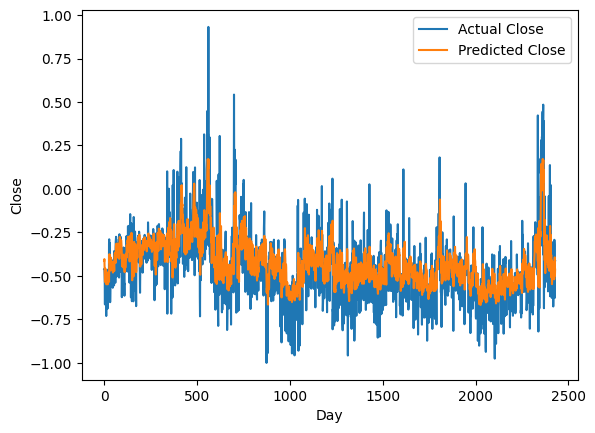

In [148]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [149]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([47.12757816, 47.88843665, 44.62911745, ..., 48.62728277,
       40.91222809, 43.46881292])

In [150]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([43.73266639, 43.87241719, 42.24141707, ..., 31.649583  ,
       47.11124892, 47.08833419])

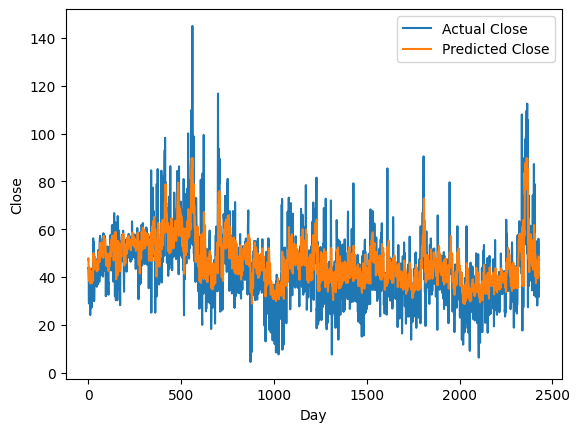

In [151]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [152]:

z=new_y_train-train_predictions
z=np.square(z)
z=np.mean(z)

In [154]:
z=np.sqrt(z)
z

10.20983074206445